# Activity 1.3 : Regularization

Hernandez, Eujean Marie T. <br> CPE32S8

#### Objective(s):

This activity aims to demonstrate how to apply  regularization in neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks with regularization
* Demonstrate how to visualize the model with regularization
* Evaluate the result of model with regularization


#### Resources:
* Jupyter Notebook
* MNIST


#### Procedures
Load the necessary libraries

In [ ]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data, shuffled and split between train and test sets

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Get the size of the sample train data

In [ ]:
x_train[0].shape

(28, 28)

Check the sample train data

In [ ]:
x_train[333]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  95, 253, 252,
        252, 252, 252, 253, 252, 252, 252, 252, 245,  80,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  68, 246, 205,  69,
         69,  69,  69,  69,  69,  69,  69, 205, 253, 240,  50,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 187, 252, 218,  34,
          0,   0,   0,   0,   0,   0,   0, 116, 253, 252,  69,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 248, 252, 253,  92,
          0,   0,   0,   0,   0,   0,  95, 230, 253, 157,   6,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 249, 253, 189,  42,
          0,   0,   0,   0,  36, 170, 253, 243, 158,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 252, 245, 140,
         34,   0,   0,  57, 219, 252, 235,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  25, 205, 253, 252,
        234, 184, 184, 253, 240, 100,  44,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 161, 219,
        252, 252, 252, 234,  37,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 203,
        252, 252, 252, 251, 135,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   9,  76, 255, 253,
        205, 168, 220, 255, 253, 137,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 114, 252, 249, 132,
         25,   0,   0, 180, 252, 252,  45,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 220, 252, 199,   0,
          0,   0,   0,  38, 186, 252, 154,   7,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 252,  21,   0,
          0,   0,   0,   0,  67, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 200,   0,   0,
          0,   0,   0,   0,  47, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 185, 253, 201,   0,   0,
          0,   0,   0,   3, 118, 253, 245,  21,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 163, 252, 252,   0,   0,
          0,   0,   0,  97, 252, 252,  87,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 240, 252, 123,  70,
         70, 112, 184, 222, 252, 170,  13,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 165, 252, 253, 252,
        252, 252, 252, 245, 139,  13,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

Check the corresponding label in the training set

In [ ]:

y_train[333]

8

Check the actual image

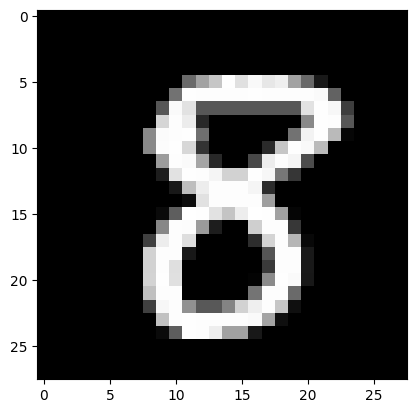

In [ ]:

plt.imshow(x_train[333], cmap='Greys_r')

Check the shape of the x_train and x_test

In [ ]:
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


* Convert the x_train and x_test
* Cast the numbers to floats
* Normalize the inputs

In [ ]:

x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test /= 255


Convert class vectors to binary class matrices

In [ ]:

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

* Build the model with two hidden layers of size 512.
* Use dropout of 0.2
* Check the model summary

In [ ]:

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                50240     
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile the model using learning rate of 0.001 and optimizer of RMSprop

In [ ]:
learning_rate = .001
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 2s 4ms/step - loss: 0.5177 - accuracy: 0.8456 - val_loss: 0.2061 - val_accuracy: 0.9379
Epoch 2/30
469/469 [==============================] - 2s 3ms/step - loss: 0.2496 - accuracy: 0.9269 - val_loss: 0.1535 - val_accuracy: 0.9532
Epoch 3/30
469/469 [==============================] - 2s 3ms/step - loss: 0.1990 - accuracy: 0.9410 - val_loss: 0.1250 - val_accuracy: 0.9613
Epoch 4/30
469/469 [==============================] - 2s 3ms/step - loss: 0.1723 - accuracy: 0.9497 - val_loss: 0.1153 - val_accuracy: 0.9650
Epoch 5/30
469/469 [==============================] - 2s 3ms/step - loss: 0.1542 - accuracy: 0.9541 - val_loss: 0.1100 - val_accuracy: 0.9681
Epoch 6/30
469/469 [==============================] - 2s 5ms/step - loss: 0.1428 - accuracy: 0.9580 - val_loss: 0.0985 - val_accuracy: 0.9717
Epoch 7/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1331 - accuracy: 0.9608 - val_loss: 0.1025 - val_accuracy: 0.9681
Epoch 

Use Keras evaluate function to evaluate performance on the test set

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09931952506303787
Test accuracy: 0.9757999777793884


Interpret the result

 # The test loss 0.1032 is low which indicates the average error between  predicted and actual values is low. And the model achieved a very high accuracy of 97%. The low test loss and high accuracy, suggest that the model perform well on classifying the digits.

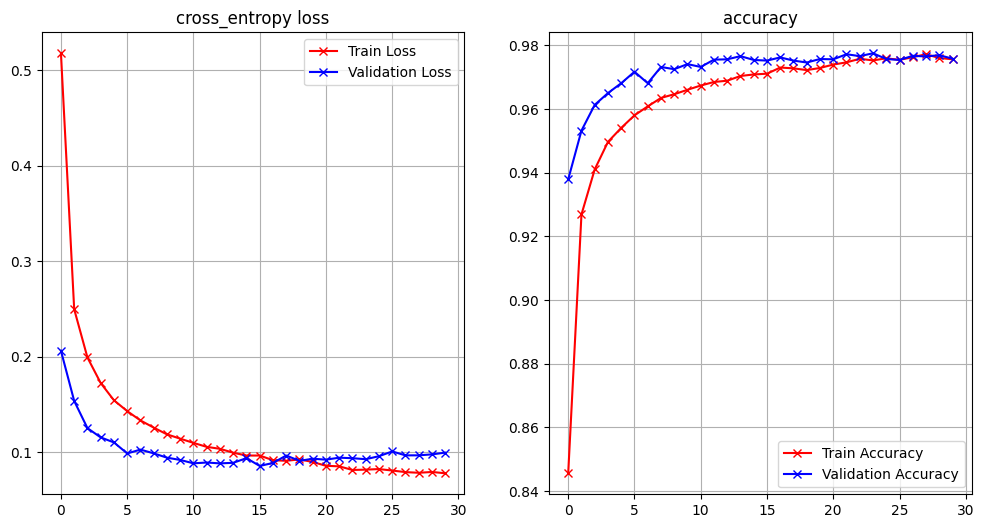

In [ ]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

Interpret the result

# At first, the model shows underfitting indicating poor performance. However, as the training progress the model's performance improve between 10 to 30 epoch. The improvement suggest that the model is learning from the data and capturing the underlying patterns. In the accuracy, both train and validation accuracy increase over epochs with a small gap, which suggest that the model is performing well on both training and validation set.

#### Supplementary Activity

* Use the Keras "Sequential" functionality to build a new model (model_1) with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
6. Use at least two  regularization techniques and apply it to the new model (model_2)
7. Train this model for your preferred epochs , learning rate, batch size and optimizer
8. Compare the accuracy and loss (training and validation) of model_1 and model_2

# Build Model 1

In [ ]:
model_1 = Sequential([
    Dense(400, activation='relu', input_shape=(784,)),
    Dropout(0.4),
    Dense(300, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

In [ ]:
# Print the summary of Model 1
model_1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 400)               314000    
                                                                 
 dropout_16 (Dropout)        (None, 400)               0         
                                                                 
 dense_25 (Dense)            (None, 300)               120300    
                                                                 
 dropout_17 (Dropout)        (None, 300)               0         
                                                                 
 dense_26 (Dense)            (None, 10)                3010      
                                                                 
Total params: 437310 (1.67 MB)
Trainable params: 437310 (1.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128

In [ ]:
# Compile the model with RMSProp optimizer
learning_rate = .001
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])

# Train the model for 20 epochs and 128 batch size
batch_size = 128
epochs = 20
history_model_1 = model_1.fit(x_train, y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=1,
                            validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0352 - accuracy: 0.9891 - val_loss: 0.0739 - val_accuracy: 0.9849
Epoch 2/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0374 - accuracy: 0.9891 - val_loss: 0.0763 - val_accuracy: 0.9836
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0361 - accuracy: 0.9893 - val_loss: 0.0740 - val_accuracy: 0.9848
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0347 - accuracy: 0.9899 - val_loss: 0.0766 - val_accuracy: 0.9850
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0318 - accuracy: 0.9906 - val_loss: 0.0797 - val_accuracy: 0.9849
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0318 - accuracy: 0.9905 - val_loss: 0.0880 - val_accuracy: 0.9837
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0303 - accuracy: 0.9911 - val_loss: 0.0789 - val_accuracy: 0.9860

In [ ]:
score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08758890628814697
Test accuracy: 0.9847000241279602


How many parameters does your model have? How does it compare with the previous model?

The model consist of 437310

# Build Model 2

In [ ]:
# Build model_2
model_2 = Sequential([
    Dense(400, activation='relu', input_shape=(784,)),
    Dropout(0.4),
    Dense(300, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

**Compile model_2 with SGD optimizer**

In [ ]:
from keras.optimizers import SGD

model_2.compile(loss='categorical_crossentropy',
                optimizer=SGD(lr=0.02),
                metrics=['accuracy'])

Train this model for 30 epochs with SGD at a learning rate of .002 and a batch size of 256

In [ ]:
history_model_2 = model_2.fit(x_train, y_train,
                              batch_size=256,
                              epochs=30,  # Your preferred epochs
                              verbose=1,
                              validation_data=(x_test, y_test))

Epoch 1/30
235/235 [==============================] - 4s 16ms/step - loss: 1.8395 - accuracy: 0.4161 - val_loss: 1.1202 - val_accuracy: 0.7977
Epoch 2/30
235/235 [==============================] - 4s 16ms/step - loss: 1.0456 - accuracy: 0.6966 - val_loss: 0.6277 - val_accuracy: 0.8536
Epoch 3/30
235/235 [==============================] - 5s 19ms/step - loss: 0.7576 - accuracy: 0.7720 - val_loss: 0.4833 - val_accuracy: 0.8729
Epoch 4/30
235/235 [==============================] - 4s 15ms/step - loss: 0.6384 - accuracy: 0.8061 - val_loss: 0.4167 - val_accuracy: 0.8849
Epoch 5/30
235/235 [==============================] - 3s 15ms/step - loss: 0.5655 - accuracy: 0.8282 - val_loss: 0.3771 - val_accuracy: 0.8942
Epoch 6/30
235/235 [==============================] - 4s 18ms/step - loss: 0.5209 - accuracy: 0.8436 - val_loss: 0.3497 - val_accuracy: 0.9016
Epoch 7/30
235/235 [==============================] - 4s 15ms/step - loss: 0.4849 - accuracy: 0.8547 - val_loss: 0.3290 - val_accuracy: 0.9067

# Compare the accuracy and loss (training and validation) of model_1 and model_2

In [ ]:
# Evaluate model_1
score_model_1 = model_1.evaluate(x_test, y_test, verbose=0)
print('\tModel 1')
print('Test loss:', score_model_1[0])
print('Test accuracy:', score_model_1[1])

	Model 1
Test loss: 0.08758890628814697
Test accuracy: 0.9847000241279602


In [ ]:
# Evaluate model_2
score_model_2 = model_2.evaluate(x_test, y_test, verbose=0)
print('\tModel 2')
print('Test loss:', score_model_2[0])
print('Test accuracy:', score_model_2[1])

	Model 2
Test loss: 0.1784864366054535
Test accuracy: 0.9465000033378601


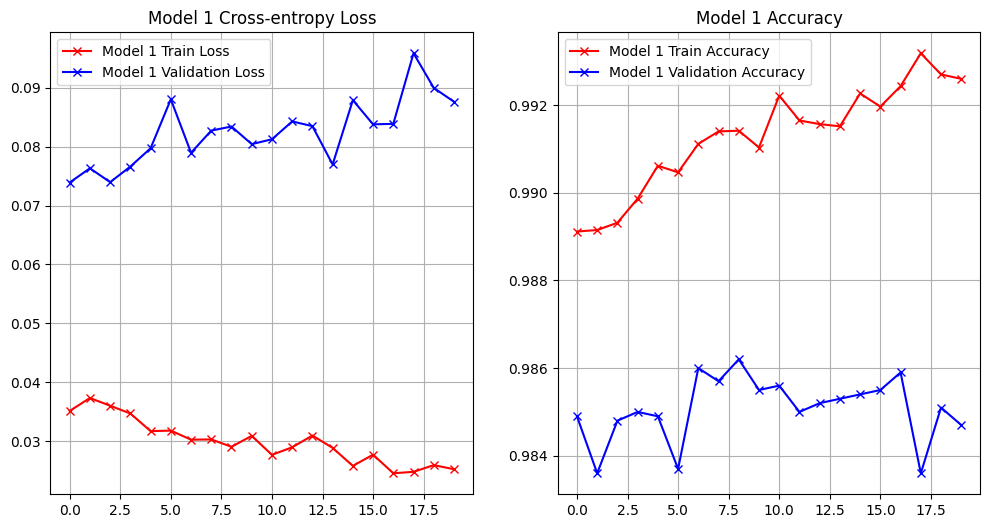

In [ ]:
def plot_loss_accuracy_model1(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"], 'r-x', label="Model 1 Train Loss")
    ax.plot(history.history["val_loss"], 'b-x', label="Model 1 Validation Loss")
    ax.legend()
    ax.set_title('Model 1 Cross-entropy Loss')
    ax.grid(True)

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"], 'r-x', label="Model 1 Train Accuracy")
    ax.plot(history.history["val_accuracy"], 'b-x', label="Model 1 Validation Accuracy")
    ax.legend()
    ax.set_title('Model 1 Accuracy')
    ax.grid(True)

plot_loss_accuracy_model1(history_model_1)
plt.show()

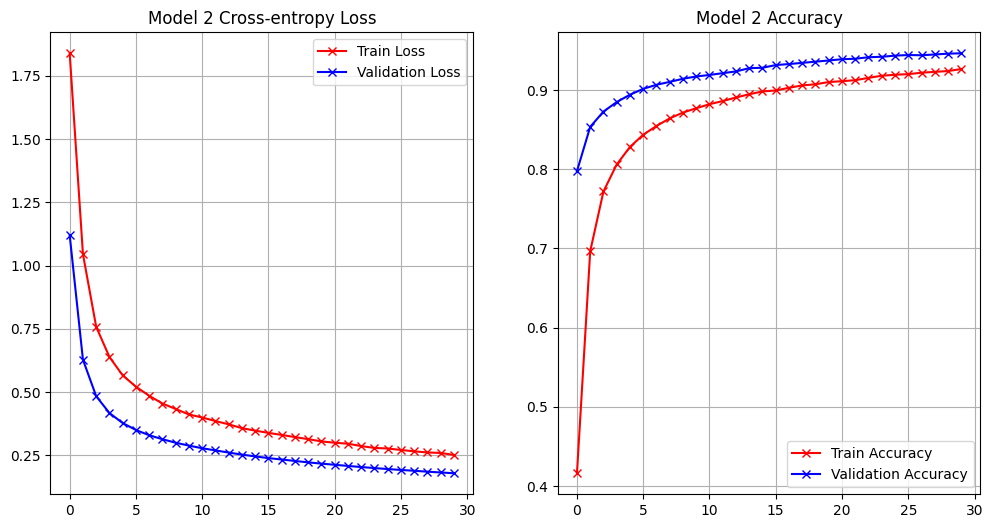

In [ ]:
def plot_loss_accuracy_model2(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"], 'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"], 'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('Model 2 Cross-entropy Loss')
    ax.grid(True)

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"], 'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"], 'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('Model 2 Accuracy')
    ax.grid(True)

plot_loss_accuracy_model2(history_model_2)
plt.show()

# Using RMSProp optimizer

In [ ]:
# Compile model_2 with RMSProp optimizer

model_2.compile(loss='categorical_crossentropy',
                optimizer=RMSprop(learning_rate=0.02),
                metrics=['accuracy'])

In [ ]:
history_model_2 = model_2.fit(x_train, y_train,
                              batch_size=256,
                              epochs=30,
                              verbose=1,
                              validation_data=(x_test, y_test))

Epoch 1/30
235/235 [==============================] - 5s 20ms/step - loss: 2.4197 - accuracy: 0.7884 - val_loss: 0.2893 - val_accuracy: 0.9205
Epoch 2/30
235/235 [==============================] - 4s 16ms/step - loss: 0.4975 - accuracy: 0.8805 - val_loss: 0.3737 - val_accuracy: 0.8973
Epoch 3/30
235/235 [==============================] - 4s 17ms/step - loss: 0.4643 - accuracy: 0.8950 - val_loss: 0.2320 - val_accuracy: 0.9391
Epoch 4/30
235/235 [==============================] - 4s 18ms/step - loss: 0.4408 - accuracy: 0.9015 - val_loss: 0.2219 - val_accuracy: 0.9448
Epoch 5/30
235/235 [==============================] - 4s 18ms/step - loss: 0.4332 - accuracy: 0.9043 - val_loss: 0.2401 - val_accuracy: 0.9450
Epoch 6/30
235/235 [==============================] - 6s 28ms/step - loss: 0.4225 - accuracy: 0.9066 - val_loss: 0.2240 - val_accuracy: 0.9496
Epoch 7/30
235/235 [==============================] - 4s 16ms/step - loss: 0.4223 - accuracy: 0.9104 - val_loss: 0.2557 - val_accuracy: 0.9422

In [ ]:
# Evaluate model_2
score_model_2 = model_2.evaluate(x_test, y_test, verbose=0)
print('\tModel 2')
print('Test loss:', score_model_2[0])
print('Test accuracy:', score_model_2[1])

	Model 2
Test loss: 0.2632131278514862
Test accuracy: 0.9562000036239624


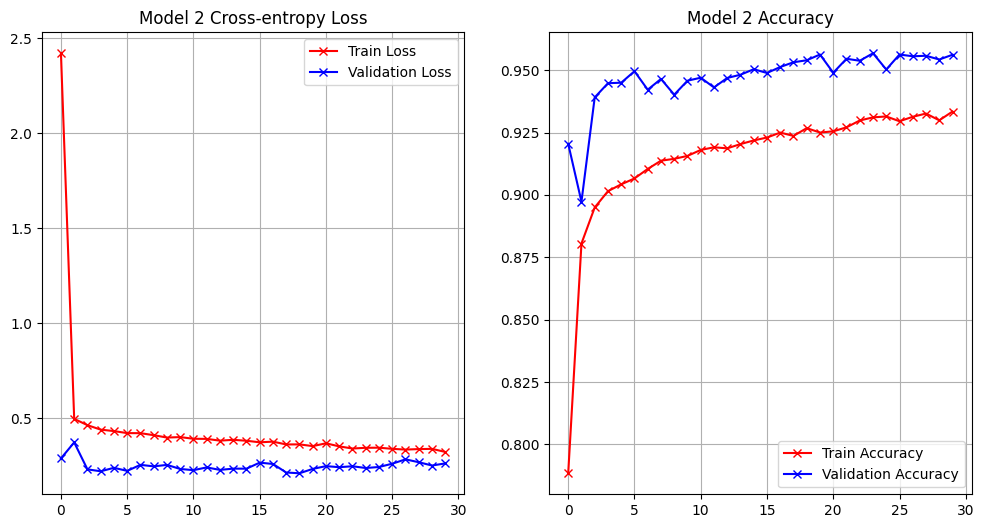

In [ ]:
def plot_loss_acc(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('Model 2 Cross-entropy Loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('Model 2 Accuracy')
    ax.grid(True)


plot_loss_acc(history_model_2)

Both model have low test loss and high accuracy indicating that the model performe well. However, in the plot model 1, there is a huge gap between train and validation for both cross-entropy and accuracy. This suggest that the model 1 is overfitting the training data. As we can see in the plot for model 2, it shows a narrow gap between train and validation curves, signifies that the model perform well. Based on the output of model 2, the use of SGD optimizer and the chosen hyperparemeter are effective in the data set and it improve the model's performance.

# Comparison of SDG and RMSprop

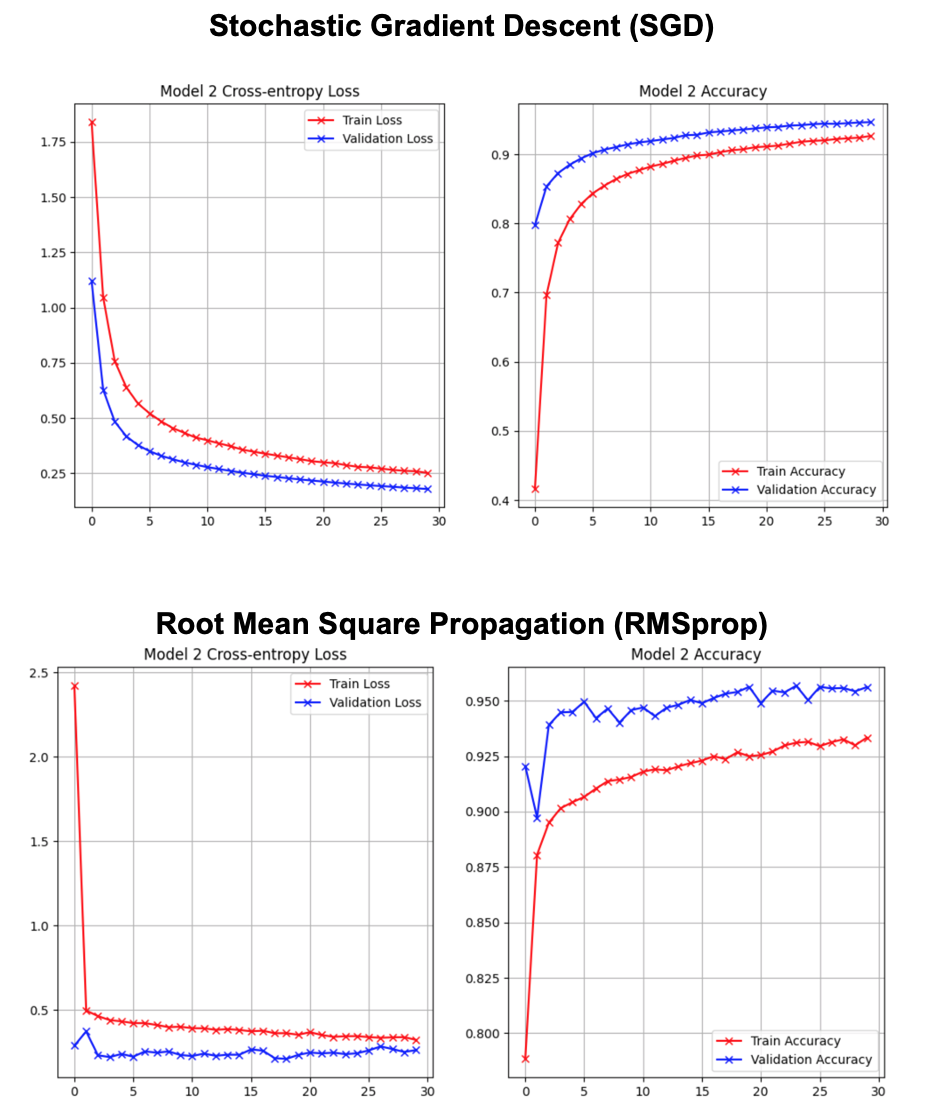

With the same hyperparameters such as learning rate, epoch, and number of batch size, the SDG optimizer have a better result than the rmsprop. This observation implies that using the SDG optimizer is preferable for the model and dataset that we utilize.

# Conclusion

# In this activity, we use MNIST data set to explore the application of regularization techniques in neural networks. We train and build a model using keras sequential and dropout as regularization to help prevent overfitting during the training process. All of the 3 model have low test loss and high accuracy indicating that the model perform well. However, upon visualizing the result, I observed that the model underfiting and overfiting the data. To identify the best solution, I employ several optimizers and select the appropriate hyperparameters. I conclude that choosing the right optimizer and hyperparameters can help us to improve the model performance.

Google Colab Link: https://colab.research.google.com/drive/1oLyEJw2Yf-Pstr7EFmOieaN_92UZqnpP?authuser=1#scrollTo=relevant-thunder